In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("house_prices.csv")
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [3]:
my_cols = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'SalePrice'
]

df_subset = train_df[my_cols].copy()

In [4]:
df_subset.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
254,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,145000
1066,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,178000
638,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,85000
799,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,175000
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,127000


In [5]:
df_subset.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
1095,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,176432
1130,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,135000
1294,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,115000
860,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,189950
1126,120,RL,53.0,3684,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,174000


In [6]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1168 non-null   int64  
 1   MSZoning      1168 non-null   object 
 2   LotFrontage   951 non-null    float64
 3   LotArea       1168 non-null   int64  
 4   Street        1168 non-null   object 
 5   Alley         74 non-null     object 
 6   LotShape      1168 non-null   object 
 7   LandContour   1168 non-null   object 
 8   Utilities     1168 non-null   object 
 9   LotConfig     1168 non-null   object 
 10  LandSlope     1168 non-null   object 
 11  Neighborhood  1168 non-null   object 
 12  Condition1    1168 non-null   object 
 13  Condition2    1168 non-null   object 
 14  SalePrice     1168 non-null   int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 146.0+ KB


In [7]:
df_subset.describe()

,MSSubClass,LotFrontage,LotArea,SalePrice
count,1168.000000,951.000000,1168.000000,1168.000000
mean,56.849315,70.343849,10689.642123,181441.541952
std,42.531862,24.897021,10759.366198,77263.583862
min,20.000000,21.000000,1300.000000,34900.000000
25%,20.000000,59.000000,7587.250000,130000.000000
50%,50.000000,70.000000,9600.000000,165000.000000
75%,70.000000,80.000000,11700.000000,214925.000000
max,190.000000,313.000000,215245.000000,745000.000000


In [8]:
df_subset.shape

(1168, 15)

## Checking for missing values

In [9]:
missing_per_col = df_subset.isna().sum().sort_values(ascending = False) 
total_missing = int(missing_per_col.sum()) 
print("Total missing values:", total_missing) 
missing_per_col 

Total missing values: 1311


Alley           1094
LotFrontage      217
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
SalePrice          0
dtype: int64

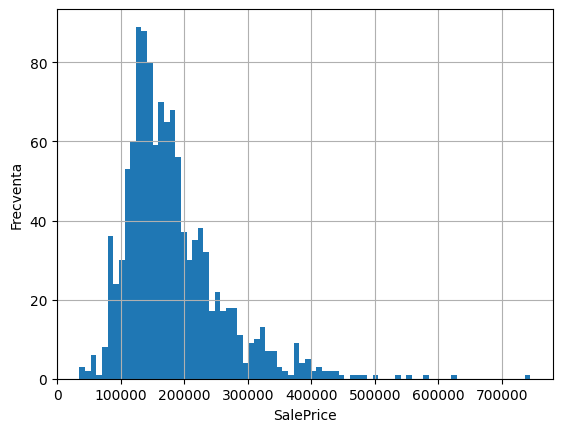

In [10]:
plt.figure()
df_subset['SalePrice'].hist(bins=80)
plt.ylabel('Frecventa')
plt.xlabel('SalePrice')
plt.show()

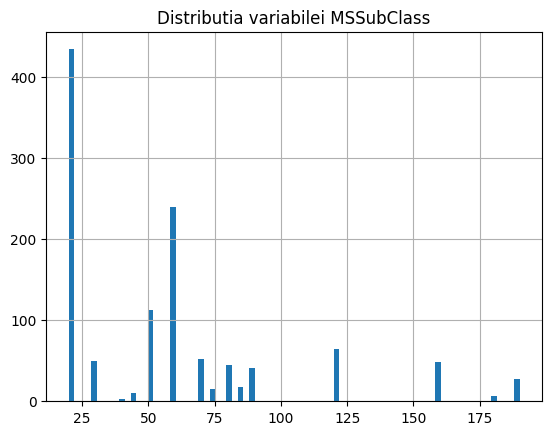

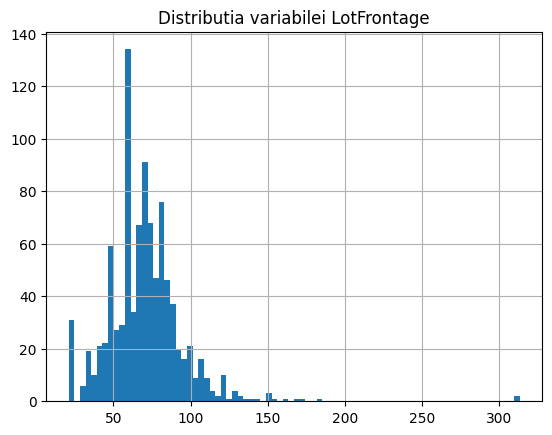

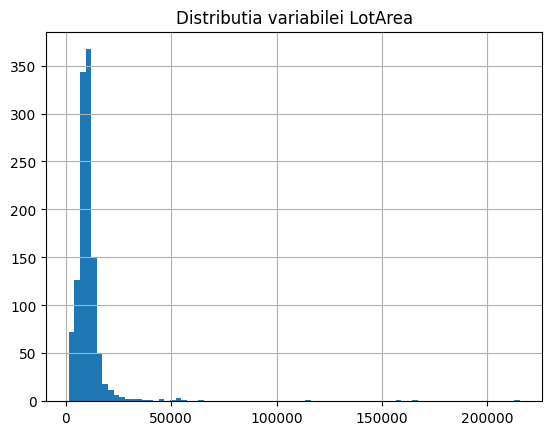

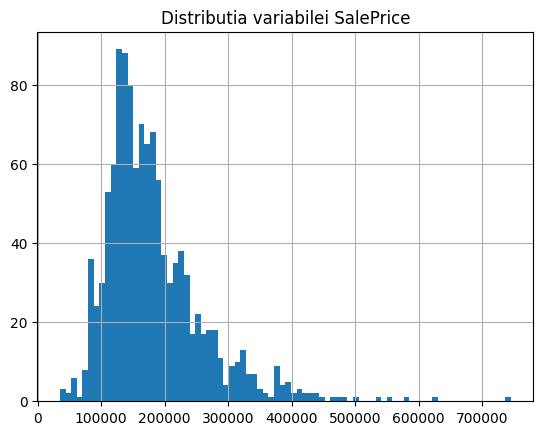

In [11]:
numeric_cols = df_subset.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure()
    df_subset[col].hist(bins=80)
    plt.title(f'Distributia variabilei {col}')
    plt.show()


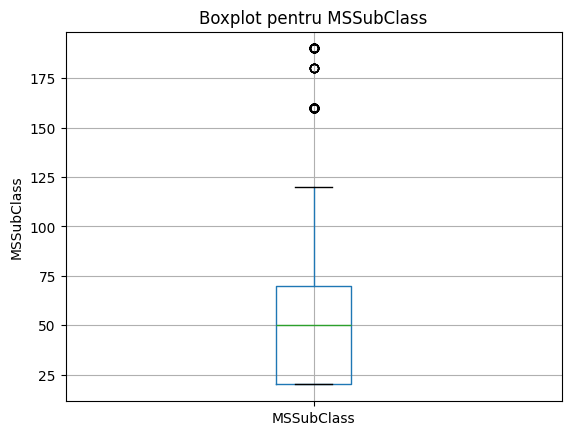

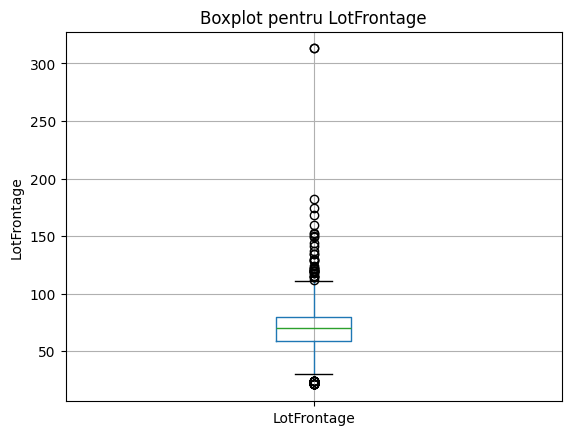

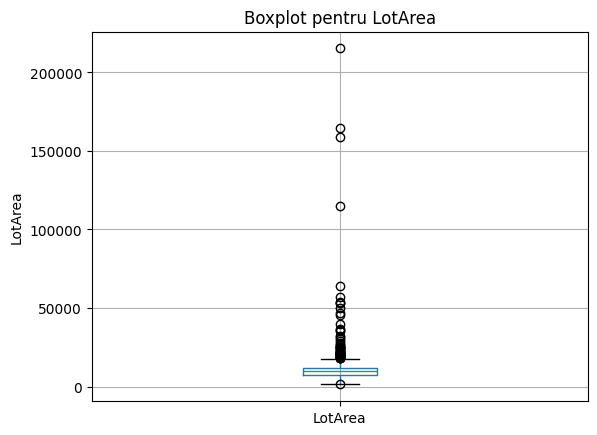

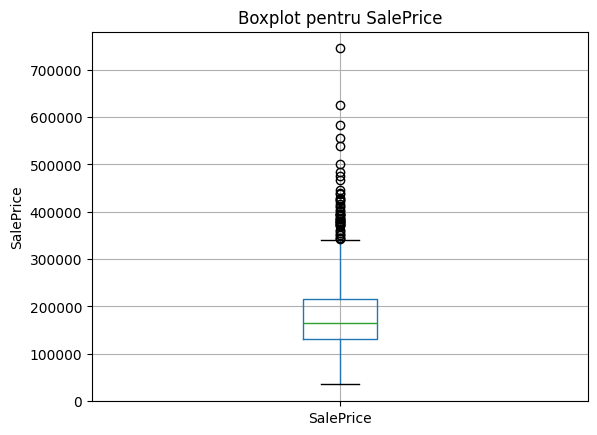

In [12]:
for col in numeric_cols:
    plt.figure()
    df_subset.boxplot(column=col)
    plt.title(f'Boxplot pentru {col}')
    plt.ylabel(col)
    plt.show()
    

In [13]:
for col in numeric_cols:
    fig = px.box(df_subset, y=col,title=f'Boxplot pentru {col}')
    fig.show()

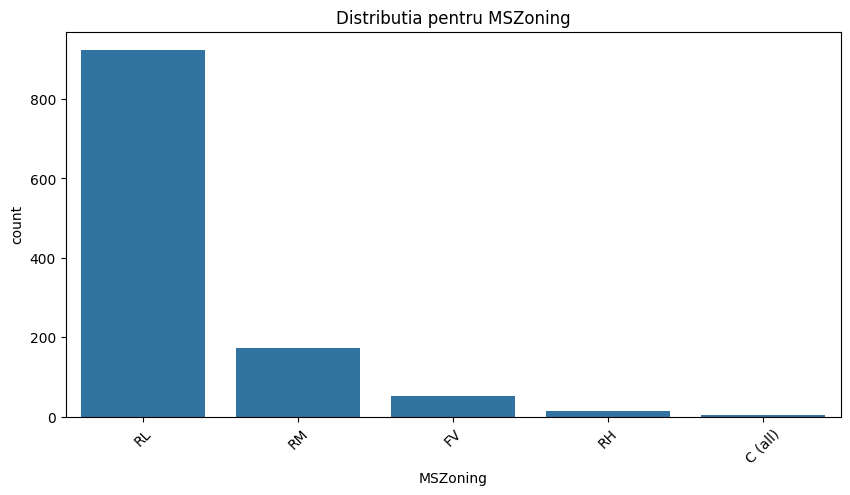

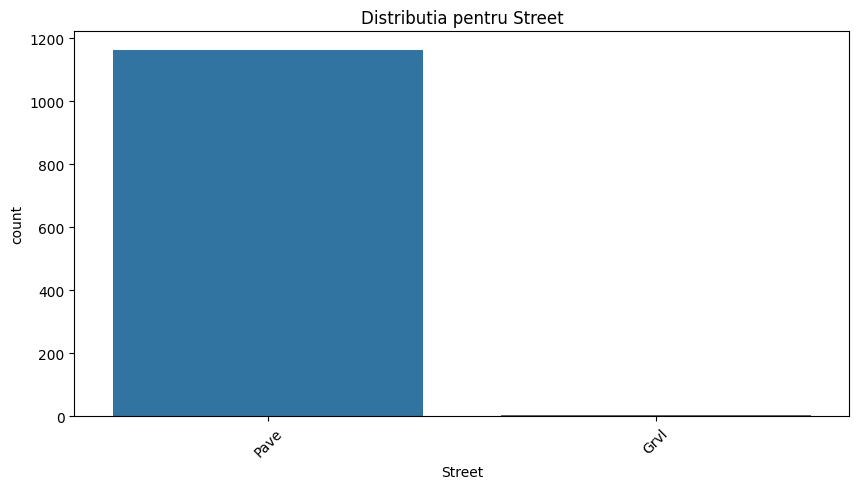

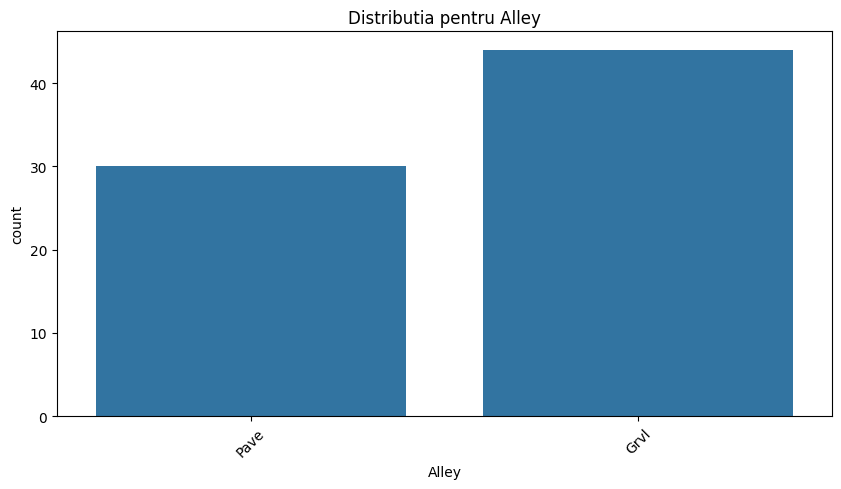

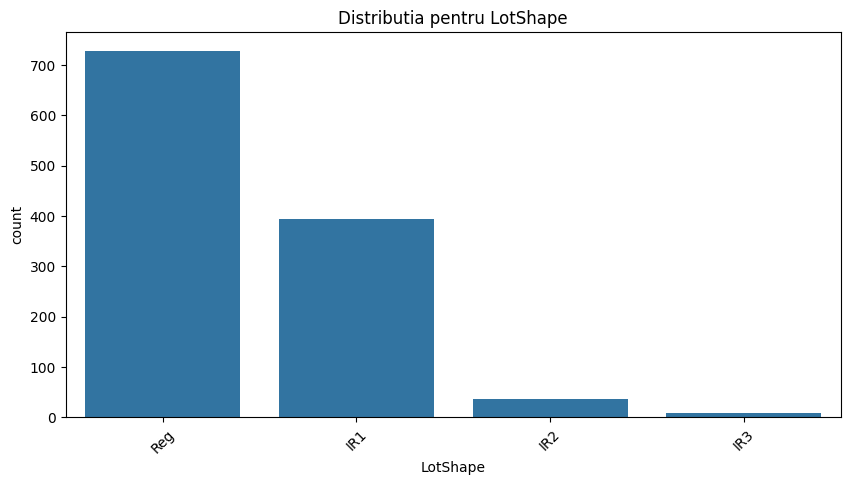

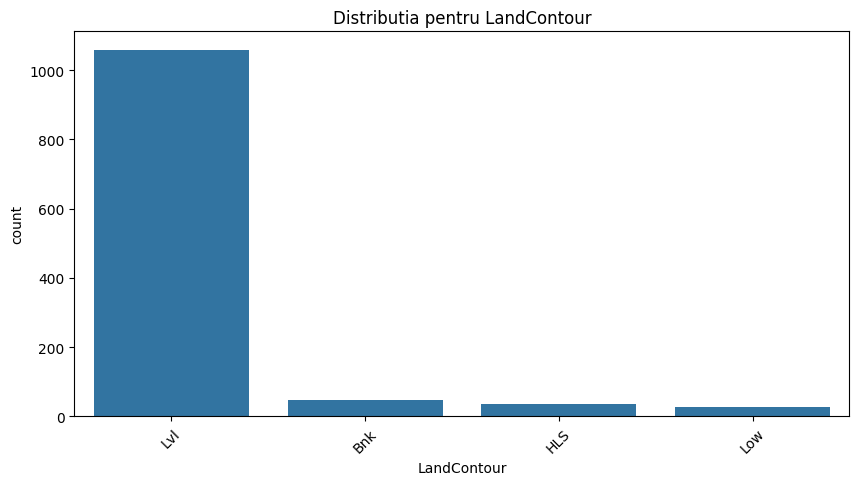

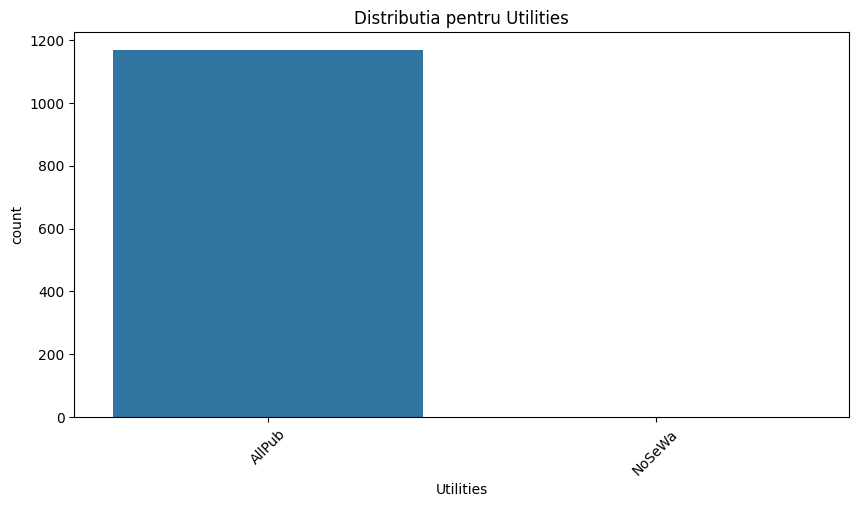

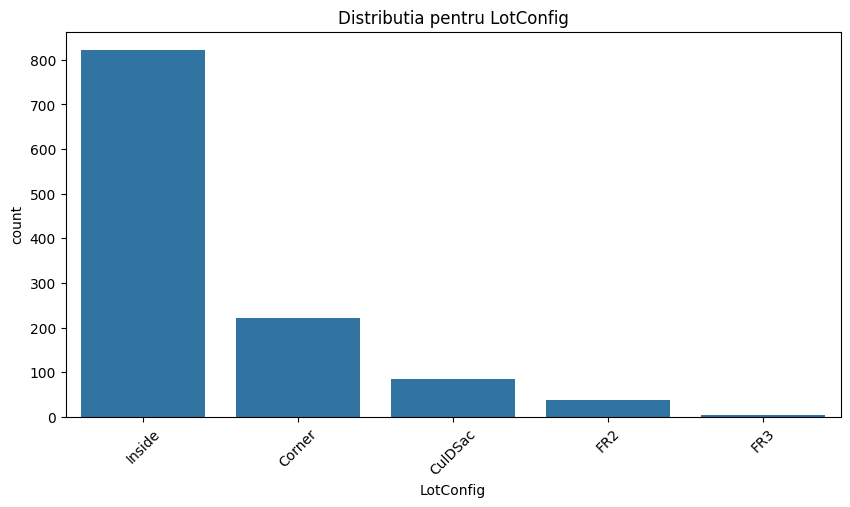

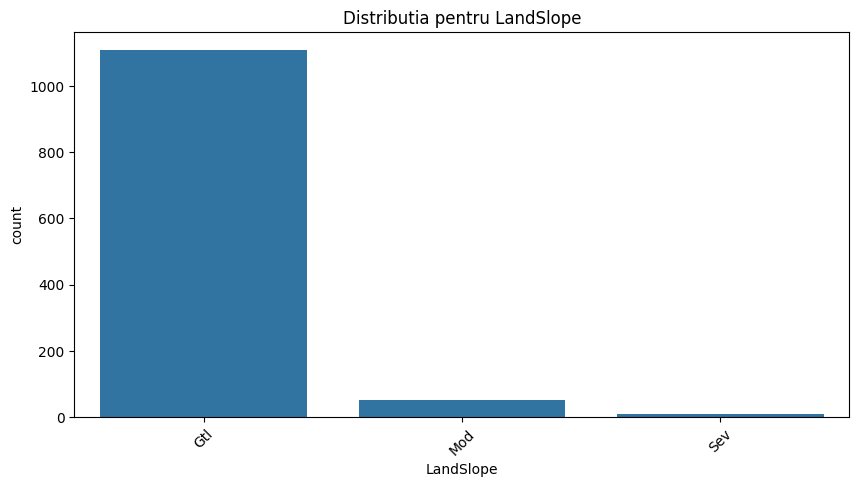

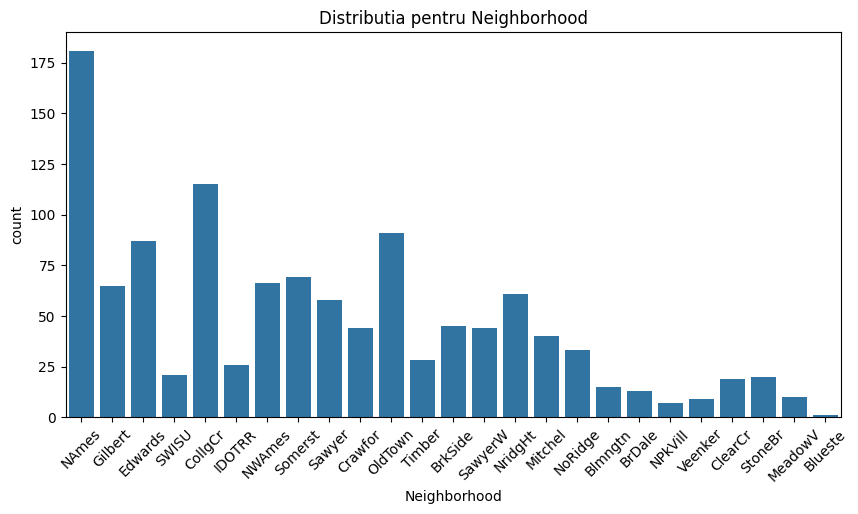

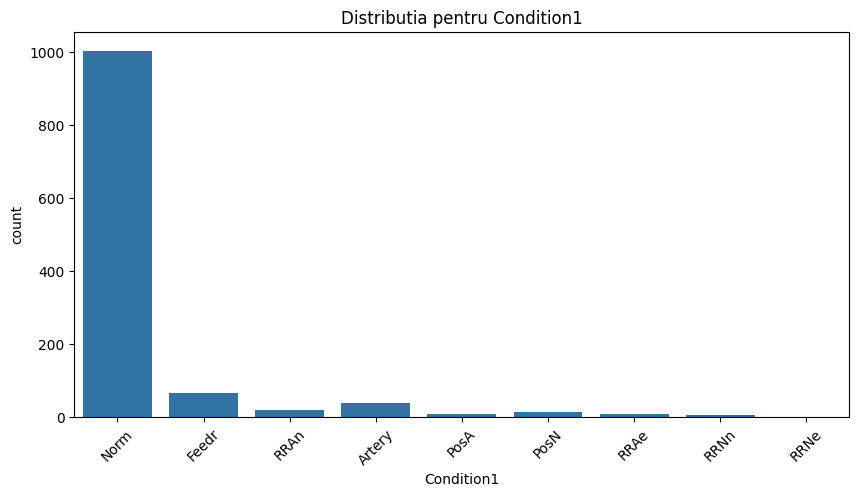

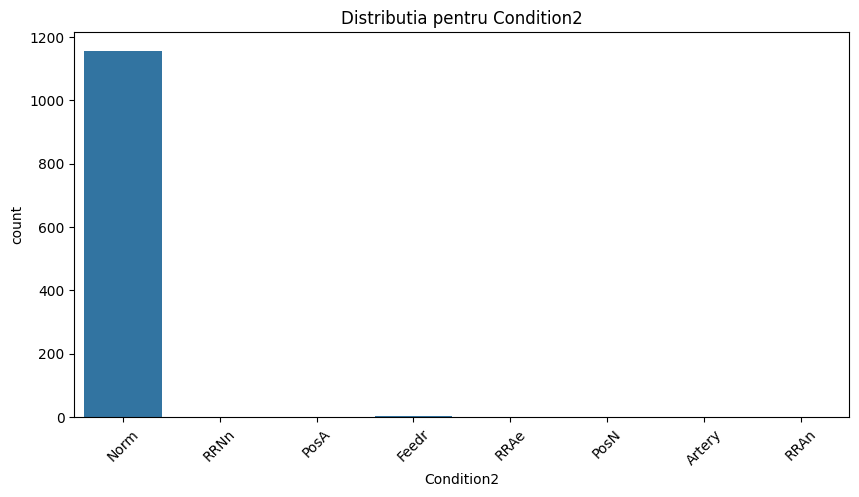

In [14]:
categorical_cols = df_subset.select_dtypes(include=[object]).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df_subset)
    plt.title(f'Distributia pentru {col}')
    plt.xticks(rotation=45)
    plt.show()
